In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import joblib


In [27]:
df = pd.read_csv("news.csv")

In [28]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [29]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [30]:
df['textlen'] = df['text'].apply(len)

In [31]:
df.head()

,Unnamed: 0,title,text,label,textlen
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [32]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

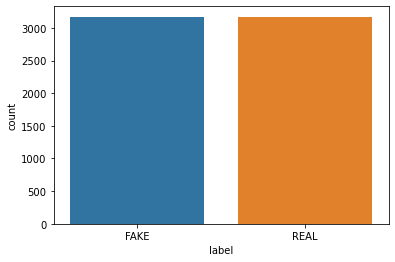

In [33]:
sns.countplot(x="label", data=df)

In [34]:
df.head()

,Unnamed: 0,title,text,label,textlen
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [35]:
df['text'][0].lower()

'daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. \nin the final stretch of the election, hillary rodham clinton has gone to war with the fbi. \nthe word “unprecedented” has been thrown around so often this election that it ought to be retired. but it’s still unprecedented for the nominee of a major political party to go war with the fbi. \nbut that’s exactly what hillary and her people have done. coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillary’s opponent in this election. \nthe fbi is under attack by everyone from obama to cnn. hillary’s people have circulated a letter attacking comey. there are currently more media hit pieces lambasting him than targeting trump. it wouldn’t be too surprising if the clintons or their allies were to start running attack ads against the fbi. \nthe fbi’s leadership is being warned that the entir

In [36]:
df['text']=df['text'].str.lower()

In [37]:
df.head()

,Unnamed: 0,title,text,label,textlen
0,8476,You Can Smell Hillary’s Fear,"daniel greenfield, a shillman journalism fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,it's primary day in new york and front-runners...,REAL,1840


In [38]:
X=df['text']
y=df['label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [40]:
y_train.value_counts()

REAL    2124
FAKE    2120
Name: label, dtype: int64

In [41]:
y_test.value_counts()

REAL    1047
FAKE    1044
Name: label, dtype: int64

In [42]:

  

# Create a Vectorizer Object
vectorizer = CountVectorizer(stop_words='english')
  
vectorizer.fit(X_train)

CountVectorizer(stop_words='english')

In [43]:

vector_train = vectorizer.transform(X_train)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector_train.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
vector_test = vectorizer.transform(X_test)


In [45]:
clf = MultinomialNB()
clf.fit(vector_train, y_train)


MultinomialNB()

In [46]:
y_pred = clf.predict(vector_test)
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("SVM Accuracy = " + format((m-n)/m*100, '.2f') + "%")



SVM Accuracy = 88.57%


In [47]:


#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[889 155]
 [ 84 963]]


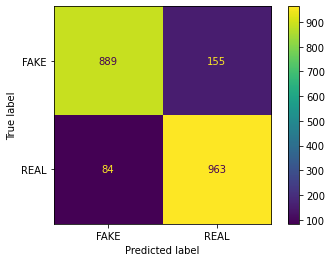

In [48]:
plot_confusion_matrix(clf,vector_test,y_test)

In [49]:
print(classification_report(y_test,y_pred))
    


              precision    recall  f1-score   support

        FAKE       0.91      0.85      0.88      1044
        REAL       0.86      0.92      0.89      1047

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



# method 2

In [51]:

# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""

model_pipeline = Pipeline(steps=[('vectorizer',CountVectorizer(stop_words='english')),('clf',MultinomialNB())])
        

In [52]:
# fit the pipeline with the training data
#xtrain, ytrain
model_pipeline.fit(X_train,y_train)



# predict target values on the training data
model_pipeline.predict(X_test)

array(['REAL', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'FAKE'], dtype='<U4')

In [53]:
y_pred = model_pipeline.predict(X_test)
m = y_test.shape[0]
n = (y_test != y_pred).sum()
print("SVM Accuracy = " + format((m-n)/m*100, '.2f') + "%")

SVM Accuracy = 88.57%


In [54]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[889 155]
 [ 84 963]]


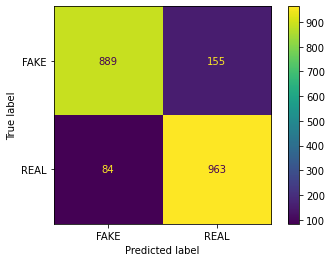

In [55]:
plot_confusion_matrix(clf,vector_test,y_test)